## Analyze A/B Test Results

This project covers the following statistics topics:

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. 

In this project, I worked to understand the results of an A/B test run by an e-commerce website.  The goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


`1.` Read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
len(df['user_id'].unique().tolist())

290584

d. The proportion of users converted.

In [5]:
df['converted'].value_counts()[1]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
t_o=df[(df['group']=='treatment' ) & (df['landing_page'] == 'old_page')]
t_o.shape[0]

1965

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.    

a. Create a new dataset that meets the specifications.  Store your new dataframe in **df2**.

In [8]:
# drop rows where landing page/group are inaccurate
df2=df.drop(df[(df['group']=='treatment' ) & (df['landing_page'] == 'old_page')].index)
df2=df2.drop(df[(df['group']=='control' ) & (df['landing_page'] == 'new_page')].index)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions.

a. How many unique **user_id**s are in **df2**?

In [11]:
len(df2['user_id'].unique().tolist())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df_new=df2.drop(1899)


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
convert=df_new[df_new['converted']==1]
convert.shape[0]/df_new.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control=df_new[df_new['group']=='control']
control_convert=control[control['converted']==1]
control_prob=control_convert.shape[0]/control.shape[0]
control_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treat=df_new[df_new['group']=='treatment']
treat_convert=treat[treat['converted']==1]
treat_prob=treat_convert.shape[0]/treat.shape[0]
treat_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
newpage=df_new[df_new['landing_page']=='new_page']
newpage.shape[0]/df_new.shape[0]

0.5000619442226688

In [20]:
newpage_coverted=newpage[newpage['converted']==1]
newpage_coverted.shape[0]/newpage.shape[0]

0.11880806551510564

e. Considering results from a. through d. above, is sufficient evidence to say that the new treatment page leads to more conversions.


I think that there is not sufficient evidence to say that the new treatment page leads to more conversions because the probaility that folks recieved a new page and converted is very low at about 12%(11.88%). We need more information.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we can technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  
 


`1.` Consider we need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should the null and alternative hypotheses be?  State hypothesis in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis**

H_0: p_new <= p_old   or   p_new - p_old <= 0

H_1: p_new > p_old   or   p_new - p_old > 0



H_0 Reject: p-value < 0.05, statistically significant difference

H_0 Accept: p-value > 0.05, no statistically significant difference

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Using a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new=df_new['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# from the instructions, assume under the null hypothesis, p_new = p_old
p_old=df_new['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
# landing page = new
n_new=df_new.query("landing_page == 'new_page'").user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [24]:
# landing page = old
n_old=df_new.query("landing_page == 'old_page'").user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# normal is a continous distribution, binomial is finite.
# use binomial for 1's, 0's
new_page_converted=np.random.choice([0,1], n_new)
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# normal is a continous distribution, binomial is finite.
# use binomial for 1's, 0's
old_page_converted=np.random.choice([0,1], n_old)
old_page_converted

array([1, 1, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted.mean()-old_page_converted.mean()

0.001183526205574048

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [29]:
p_diffs

array([ 0.00138831, -0.00063531,  0.00035583, ...,  0.00036959,
       -0.0010207 ,  0.00231747])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

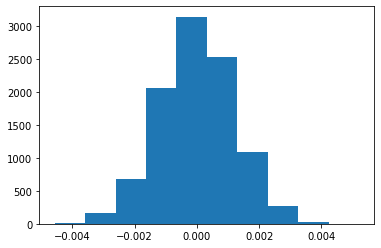

In [30]:
plt.hist(p_diffs);

In [31]:
# Simulating the distribution under the null
p_diffs=np.array(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# actual observed difference
obs_diff = treat_prob-control_prob
obs_diff

-0.0015782389853555567

proportion of the p_diffs are greater than the actual difference observed

In [33]:
(p_diffs > obs_diff).mean()

0.9055

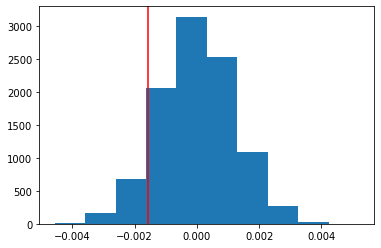

In [34]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='red');

k. What was computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?



This is called the p-value, 0.1981, which is the probability of observing your statistic if the null hypothesis is true.

This p-value appears to be greater than 0.05, which means that we should accept the null hypothesis of p_new<=p_old, or the old page is better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
# calculate the number of conversions for each page, the number of individuals who received each page
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
convert_old = df_new.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df_new.query("landing_page == 'new_page'")['converted'].sum()
n_old = df_new.query("landing_page == 'old_page'").shape[0]
n_new = df_new.query("landing_page == 'new_page'").shape[0]

In [36]:
convert_new, convert_old

(17264, 17489)

In [37]:
n_new, n_old

(145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
# compute your test statistic and p-value, right-tailed one-sided t-test
stat, pval = sm.stats.proportions_ztest([convert_new, convert_old],[n_new, n_old], alternative='larger')
print(stat, pval)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z-score & p-value**

The z-score of 1.3109 describes the deviation from the mean, in standard deviation units, or the null hypothesis is 1.3109 standard deviations from the mean. Using a 95% confidence interval, if the z is greater than 1.96, we reject the null. In this case, the null is accepted.

The p-value of 0.1899 describes the probability under the null hypothesis. The 0.1899 p-value is very similar to our previous p-value of 0.1981, which is greater than 0.05, null is accepted. Therefore, it appears that both tests agree with the previous findings.

I got help about z-scores from my old stat book and [HERE](https://www.investopedia.com/terms/z/z-test.asp#:~:text=If%20the%20value%20of%20z,the%20null%20hypothesis%20is%20rejected.)

<a id='regression'></a>
### Part III - A regression approach

`1.` The result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?



We should use a logistic regression for categorical responses of the type, T/F, Y/N, or in this case conversion/no conversion.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
# create a column for the intercept, and create a dummy variable column
df_new['intercept']=1
df_new[['c_page', 'ab_page']]=pd.get_dummies(df_new['group'])
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,c_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [40]:
logit_mod=sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:               8.077e-06
Time:                        20:59:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?



ab_page p-value is 0.190.  

Assuming under the null hypothesis that is p_new and p_old are equal, then,

H0: pnew−pold=0

H1: pnew−pold≠0

This is different from part 2 that says,

H_0: p_new <= p_old 

H_1: p_new > p_old   

f. Considering other things that might influence whether or not an individual converts:

Why it is a good idea to consider other factors to add into the regression model.  

Are there any disadvantages to adding additional terms into the regression model?



Considering our outcome so far, accept the null, I would consider other facotors that might influence whether or not an individual converts.

Advantages: adding more relevent terms into the regression model might determine other influnces on whether an individual converts or not.

Disadvantages: Adding more variables may result in multicollinearity, meaning the terms are correlated( I think of parallel lines). We can see if this is the case by using scatterplots and finding the variance inflation factor.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df_new.set_index('user_id'), how='inner')
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [43]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,c_page,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [44]:
logit_mod=sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:               2.323e-05
Time:                        20:59:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

Does it appear that country had an impact on conversion? 

US(baseline) p-value: 0

CA p-value: 0.130

UK p-value: 0.457

It appears that p-values > 0.05, we should fail to reject the null, and it appears that country has no impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
### Fit Your Linear Model And Obtain the Results
df_new['ca_page'] = df_new['CA']*df_new['ab_page']
df_new['uk_page'] = df_new['UK']*df_new['ab_page']
df_new['us_page'] = df_new['US']*df_new['ab_page']
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'ca_page', 'uk_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 Oct 2022   Pseudo R-squ.:               3.482e-05
Time:                        20:59:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
ca_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
uk_page        0.0314      0.027      1.181      0.238      -0.021       0.084
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

Based on the above, no p-value presents as statistically significant, and the interaction between country page and country appears to have no significant effects on conversion. The p-values for interaction between page and country are greater than 0.05 and we can fail to reject the null. This agrees with part g, where we show that country has no impact on conversion.

Based on the A/B testing performed in this notebook, we do not have enough evidence to reject the null hypothesis. Therefore, there are no
grounds to switch to the new page.

